## Testing

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from collections import defaultdict

#### Test speed of functions calling attributes or creating variables

In [1]:
class TestClass:
    def __init__(self):
        self.AGENT_TEAMS = {
            0: 0,
            1: 0,
            2: 1,
            3: 1
        }

        self.CAPTURE_POSITIONS = {
            0: (1, 1),
            1: (8, 8)
        }

    def test_function1(self, agent_idx):
        """
        Create variables from attributes.
        """
        agent_team = self.AGENT_TEAMS[agent_idx]
        agent_capture_pos = self.CAPTURE_POSITIONS[agent_team]
        return agent_capture_pos

    def test_function2(self, agent_idx):
        """
        Mixture.
        """
        agent_team = self.AGENT_TEAMS[agent_idx]
        return self.CAPTURE_POSITIONS[agent_team]

    def test_function3(self, agent_idx):
        """
        Reference attributes.
        """
        return self.CAPTURE_POSITIONS[self.AGENT_TEAMS[agent_idx]]

In [2]:
tester = TestClass()

In [7]:
%%timeit
tester.test_function1(0)

216 ns ± 6.83 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [8]:
%%timeit
tester.test_function2(0)

203 ns ± 3.7 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [9]:
%%timeit
tester.test_function3(0)

200 ns ± 18.8 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


#### Testing retrieving stuff from tuples

In [30]:
mini_batch = [(1, 2, 3, 4, 5), 
              (1, 2, 3, 4, 5), 
              (1, 2, 3, 4, 5)]

In [19]:
%%timeit

s = [s1 for (s1, a, r, s2, d) in mini_batch]
a = [a for (s1, a, r, s2, d) in mini_batch]
r = [r for (s1, a, r, s2, d) in mini_batch]
s2 = [s2 for (s1, a, r, s2, d) in mini_batch]
d = [d for (s1, a, r, s2, d) in mini_batch]

1.65 µs ± 45.3 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [20]:
%%timeit

s = [s1 for (s1, _, _, _, _) in mini_batch]
a = [a for (_, a, _, _, _) in mini_batch]
r = [r for (_, _, r, _, _) in mini_batch]
s2 = [s2 for (_, _, _, s2, _) in mini_batch]
d = [d for (_, _, _, _, d) in mini_batch]

1.62 µs ± 99.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [31]:
%%timeit

s = [x[0] for x in mini_batch]
a = [x[1] for x in mini_batch]
r = [x[2] for x in mini_batch]
s2 = [x[3] for x in mini_batch]
d = [x[4] for x in mini_batch]

1.56 µs ± 87.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


#### Retrieving elements from tuples 

In [34]:
mini_batch = [((10, 15), 2, 3, 4, 5), 
              ((20, 25), 2, 3, 4, 5), 
              ((30, 35), 2, 3, 4, 5)]

In [37]:
s1 = [x[0][0] for x in mini_batch]
s2 = [x[0][1] for x in mini_batch]

print(s1)
print(s2)

[10, 20, 30]
[15, 25, 35]


#### List comprehension vs inserting values into array

In [23]:
idx = 2

In [28]:
%%timeit

agent_turn = np.array([1 if i==idx else 0 for i in range(4)], dtype=np.int8)

1.15 µs ± 21.4 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [29]:
%%timeit

agent_turn = np.array([0, 0, 0, 0], dtype=np.int8)
agent_turn[idx] = 1

692 ns ± 14.3 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


#### Does a while loop break out immediately when criteria met?

In [3]:
done = False

while not done:
    print('test 1')
    print('test 2')
    done = True
    print('test 3')
    print('test 4')


test 1
test 2
test 3
test 4


In [3]:
i = 0

while True:
    print('test 1')
    if i == 2:
        print("Yahoo!")
        break
    print('test 2\n')
    i += 1

test 1
test 2

test 1
test 2

test 1
Yahoo!


In [5]:
done = False
i = 0
while not done:

    print('test 1')
    if i == 3:
        done = True
        print("Yahoo!")
        
    print('test 2\n')
    i += 1

test 1
test 2

test 1
test 2

test 1
test 2

test 1
Yahoo!
test 2



#### Flattening a numpy array

In [18]:
arr = np.array([[[11]]])
arr

array([[[11]]])

In [23]:
%%timeit
val = arr.flatten()

609 ns ± 10.3 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [24]:
%%timeit
val = np.squeeze(arr)

868 ns ± 35.9 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [25]:
%%timeit
val = arr.item()

78 ns ± 2.31 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


#### Generate a cumulative sum

In [4]:
arr = [0, 1, 1, 1, 0, 0, 3, 0, 0, 1, 1]

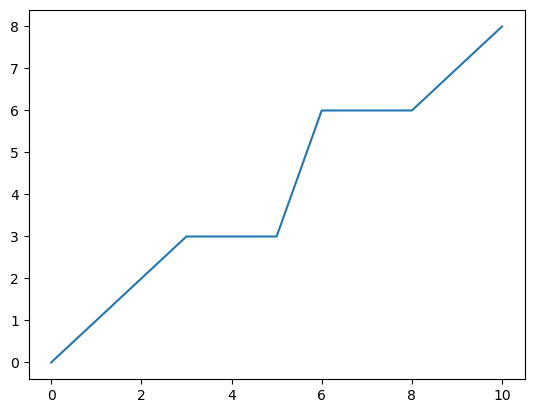

In [5]:
plt.plot(np.cumsum(arr))
plt.show()

#### Softmax with temperature

In [27]:
qvals = torch.Tensor([20, 20, 21, 20, 20])
temps = [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4]

In [28]:
for temp in temps:

    soft = torch.exp(qvals/temp) / torch.sum(torch.exp(qvals/temp))
    action = torch.multinomial(soft, 1) 
    print(f"temp: {temp} \nsoft: {soft.numpy()} \naction_probs: {action.cpu().numpy().item()} \n")

temp: 1.0 
soft: [0.14884758 0.14884758 0.40460968 0.14884758 0.14884758] 
action_probs: 3 

temp: 0.9 
soft: [0.14209126 0.14209126 0.43163496 0.14209126 0.14209126] 
action_probs: 3 

temp: 0.8 
soft: [0.13350524 0.13350524 0.46597907 0.13350524 0.13350524] 
action_probs: 2 

temp: 0.7 
soft: [0.12235807 0.12235807 0.5105678  0.12235807 0.12235807] 
action_probs: 3 

temp: 0.6 
soft: [0.10759054 0.10759054 0.5696378  0.10759054 0.10759054] 
action_probs: 0 

temp: 0.5 
soft: [0.08780358 0.08780358 0.6487856  0.08780358 0.08780358] 
action_probs: 2 

temp: 0.4 
soft: [0.06179517 0.06179517 0.7528193  0.06179517 0.06179517] 
action_probs: 2 



#### Pytorch argmax

In [31]:
q1 = torch.randn(10, 3)
q2 = torch.randn(10, 3)

print(q1)
print(q2)

tensor([[-0.9617,  1.0869, -1.2201],
        [-0.2074, -1.8541,  0.6735],
        [-0.6237,  1.5903,  0.0448],
        [-2.2092,  0.8992, -0.1374],
        [-0.0863,  0.7266, -1.3727],
        [-0.2931, -0.1200, -0.8094],
        [ 0.9258, -1.0958, -1.4117],
        [ 0.8449,  0.8673,  1.0521],
        [ 1.0607, -0.2916, -1.0127],
        [ 0.0947,  0.5460,  1.2831]])
tensor([[-0.8593, -1.4995, -1.1900],
        [ 0.8606, -1.6358,  0.4789],
        [-1.5139, -1.4613, -1.5253],
        [ 0.4223, -0.5797,  0.4200],
        [-0.3815, -1.2304, -0.8843],
        [ 0.2630,  0.0121, -1.1800],
        [ 0.5711,  0.2760, -0.2803],
        [ 0.7317, -1.2094,  1.0007],
        [ 1.3611,  0.9654,  0.6239],
        [-0.8210, -1.2034,  0.8725]])


In [55]:
%%timeit
q1_argmax = torch.argmax(q1, dim=1)


4.03 µs ± 84.6 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [56]:
%%timeit
q1_argmax = q1.max(1)[1]

8.58 µs ± 120 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [60]:
q1_argmax = torch.argmax(q1, dim=1)

q2_max = q2[np.arange(10), q1_argmax]
q2_max

tensor([-1.4995,  0.4789, -1.4613, -0.5797, -1.2304,  0.0121,  0.5711,  1.0007,
         1.3611,  0.8725])

In [64]:
%%timeit
q2[np.arange(10), q1_argmax]

20.6 µs ± 1.18 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [65]:
%%timeit
q2[torch.arange(10), q1_argmax]

12.6 µs ± 150 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


#### Testing respawn logic

In [118]:
arr = np.random.randint(10, size=(5, 5))
arr

array([[7, 0, 6, 3, 1],
       [1, 3, 6, 7, 1],
       [5, 1, 0, 3, 9],
       [7, 0, 4, 8, 8],
       [1, 7, 3, 7, 2]])

In [119]:
x = 3
y = 3

possible_respawn_offset = np.where(arr[max(x-1, 0):x+2, max(y-1, 0):y+2]==0)
new_pos = (possible_respawn_offset[0][0], possible_respawn_offset[1][0])

print(new_pos)

(0, 0)


In [120]:
possible_respawn_offset

(array([0], dtype=int64), array([0], dtype=int64))

In [115]:
open_tile = 0
open_tiles = np.where(arr==open_tile)

print(open_tiles)
print(open_tiles[0].shape[0])

(array([0, 0], dtype=int64), array([0, 1], dtype=int64))
2


In [103]:
arr.shape[0]

5

#### Testing speed of np.where


In [143]:
arr = np.random.randint(10, size=(10, 10))
arr

array([[2, 7, 2, 0, 4, 9, 8, 6, 8, 3],
       [9, 4, 3, 4, 9, 5, 6, 6, 5, 5],
       [8, 0, 1, 3, 3, 3, 0, 1, 1, 5],
       [3, 9, 3, 2, 6, 4, 9, 7, 4, 0],
       [1, 2, 3, 1, 6, 5, 1, 8, 5, 9],
       [4, 9, 7, 9, 9, 8, 0, 3, 3, 5],
       [1, 9, 8, 7, 8, 1, 3, 2, 8, 6],
       [3, 3, 9, 1, 3, 8, 8, 2, 3, 1],
       [6, 0, 4, 6, 9, 1, 2, 4, 7, 5],
       [2, 3, 2, 2, 4, 8, 7, 4, 8, 3]])

In [145]:
arr[(0, 1)] = 100
print(arr)

[[  2 100   2   0   4   9   8   6   8   3]
 [  9   4   3   4   9   5   6   6   5   5]
 [  8   0   1   3   3   3   0   1   1   5]
 [  3   9   3   2   6   4   9   7   4   0]
 [  1   2   3   1   6   5   1   8   5   9]
 [  4   9   7   9   9   8   0   3   3   5]
 [  1   9   8   7   8   1   3   2   8   6]
 [  3   3   9   1   3   8   8   2   3   1]
 [  6   0   4   6   9   1   2   4   7   5]
 [  2   3   2   2   4   8   7   4   8   3]]


In [139]:
%%timeit
(arr==0).any()

4.94 µs ± 531 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [140]:
%%timeit
np.where(arr==0)

5.27 µs ± 743 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [147]:
arr = np.random.randint(10, size=(10, 10))

x_pos, y_pos = np.where(arr==0)
print(arr)
for i in range(x_pos.shape[0]):
    print(x_pos[i], y_pos[i])
    arr[(x_pos[i], y_pos[i])] = 100

print(arr)

[[1 9 4 0 0 3 3 6 4 9]
 [3 1 0 1 4 8 2 5 0 7]
 [6 5 5 2 1 4 7 4 5 1]
 [4 5 4 1 7 2 8 9 7 1]
 [6 0 5 1 8 5 8 0 9 7]
 [8 2 7 1 5 2 1 9 9 8]
 [7 9 2 4 3 5 2 5 6 3]
 [0 3 2 4 2 7 4 9 9 5]
 [4 3 5 7 2 8 7 8 5 0]
 [0 0 9 9 4 1 4 8 0 8]]
0 3
0 4
1 2
1 8
4 1
4 7
7 0
8 9
9 0
9 1
9 8
[[  1   9   4 100 100   3   3   6   4   9]
 [  3   1 100   1   4   8   2   5 100   7]
 [  6   5   5   2   1   4   7   4   5   1]
 [  4   5   4   1   7   2   8   9   7   1]
 [  6 100   5   1   8   5   8 100   9   7]
 [  8   2   7   1   5   2   1   9   9   8]
 [  7   9   2   4   3   5   2   5   6   3]
 [100   3   2   4   2   7   4   9   9   5]
 [  4   3   5   7   2   8   7   8   5 100]
 [100 100   9   9   4   1   4   8 100   8]]


#### Unrolling values from a dict

In [120]:
AGENT_TYPES = {
    0: 0,
    1: 1,
    2: 0,
    3: 1
}

[v for v in AGENT_TYPES.values()]

[0, 1, 0, 1]

#### Tensor multiplication

In [19]:
qvals = torch.Tensor([20, 20, 21, 20, 20])
available_actions = torch.Tensor([1, 1, 1, 0, 0])
available_actions2 = torch.Tensor([1, 1, 1, -float("Inf"), -float("Inf")])
actions = torch.arange(qvals.shape[0])

In [3]:
qvals * available_actions

tensor([20., 20., 21.,  0.,  0.])

In [9]:
qvals * available_actions2

tensor([20., 20., 21., -inf, -inf])

In [17]:
torch.unique(actions * available_actions)

tensor([0., 1., 2.])

In [6]:
%%timeit
qvals * available_actions

3.36 µs ± 213 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [7]:
%%timeit
qvals * available_actions2

2.88 µs ± 58.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [14]:
[1]*4 + [-float("inf")]*4

[1, 1, 1, 1, -inf, -inf, -inf, -inf]

In [51]:
%%timeit
actions = available_actions2 > -float("Inf")
actions.nonzero().flatten()

22.9 µs ± 1.73 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [50]:
%%timeit
(available_actions2 > -float("Inf")).nonzero().flatten()

21 µs ± 791 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [46]:
np.random.choice(actions.nonzero().flatten())

1

### Debug softmax policy

In [53]:
def softmax_policy(qvals, temp=0.9):
    """
    Softmax policy - taken from Deep Reinforcement Learning in Action.
    """
    soft = torch.exp(qvals/temp) / torch.sum(torch.exp(qvals/temp))
    action = torch.multinomial(soft, 1) 
    return action.cpu().numpy().item()

In [67]:
qvals = torch.Tensor([20, 20, 21, 20, float("Inf")])
softmax_policy(qvals)

RuntimeError: probability tensor contains either `inf`, `nan` or element < 0

### Dict comprehension (and other dict stuff)

In [69]:
{k:0 for k in np.arange(4)}

{0: 0, 1: 0, 2: 0, 3: 0}

In [79]:
agent_flag_captures = defaultdict(int)
agent_flag_captures

defaultdict(int, {})

In [80]:

agent_flag_captures[0] += 1
agent_flag_captures

defaultdict(int, {0: 1})

In [104]:
agent_types = {
    0: 0,
    1: 1,
    2: 2,
    3: 2
}

agent_hp = {
    0: 8,
    1: 4,
    2: 3,
}

{kv[0]:agent_hp[kv[1]] for kv in agent_types.items()}

{0: 8, 1: 4, 2: 3, 3: 3}

In [105]:
agent_idx = 3
agent_hp[agent_types[agent_idx]]

3

In [108]:
inventory = 5

agent_inventory = {kv[0]:inventory if kv[1]==2 else 0 for kv in agent_types.items()}

agent_inventory

{0: 0, 1: 0, 2: 5, 3: 5}

In [109]:
sum([v for v in agent_inventory.values()])

10

In [271]:
agent_types = {
    0: 0,
    1: 1,
    2: 2,
    3: 2
}

agent_hp = {
    0: 8,
    1: 4,
    2: 3,
}

[agent_hp[kv[1]] for kv in agent_types.items()]

[8, 4, 3, 3]

In [276]:
metadata = np.zeros(16, dtype=np.uint)
metadata[0:4] = [agent_hp[kv[1]] for kv in agent_types.items()]

metadata


array([8, 4, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint32)

#### Sub-array locating

In [233]:
def get_subarray(arr, x, y):
    """
    Return sub-array.
    """
    return arr[max(x-1, 0):x+2, max(y-1, 0):y+2]

def get_tile_pos_within_one_cell(arr, x, y, object_tile):
    """
    Returns all positions of a specified tile within one cell of an agent.
    """
    return np.where(arr[max(x-1, 0):x+2, max(y-1, 0):y+2] == object_tile)

In [258]:
# checking subarrays
arr =np.zeros((10, 10), dtype=np.uint8)

# test data of form: test xy, object xy, test tile, object tile
test_data = [
    [(0, 0), (0, 1), 11, 2],
    [(1, 0), (2, 1), 11, 2],
    [(0, 9), (1, 8), 11, 3],
    [(5, 5), (4, 4), 11, 4],
    [(5, 9), (5, 8), 11, 5],
    [(9, 5), (8, 4), 11, 6],
]

for d in test_data:
    arr[d[0]] = d[2]
    arr[d[1]] = d[3]

print(f"array\n{arr}\n")

for i, d in enumerate(test_data):
    sub = get_subarray(arr, d[0][0], d[0][1])
    print(f"sub array {i}\nshape:{sub.shape}\n{sub}\n")


array
[[11  2  0  0  0  0  0  0  0 11]
 [11  0  0  0  0  0  0  0  3  0]
 [ 0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4  0  0  0  0  0]
 [ 0  0  0  0  0 11  0  0  5 11]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  6  0  0  0  0  0]
 [ 0  0  0  0  0 11  0  0  0  0]]

sub array 0
shape:(2, 2)
[[11  2]
 [11  0]]

sub array 1
shape:(3, 2)
[[11  2]
 [11  0]
 [ 0  2]]

sub array 2
shape:(2, 2)
[[ 0 11]
 [ 3  0]]

sub array 3
shape:(3, 3)
[[ 4  0  0]
 [ 0 11  0]
 [ 0  0  0]]

sub array 4
shape:(3, 2)
[[ 0  0]
 [ 5 11]
 [ 0  0]]

sub array 5
shape:(2, 3)
[[ 6  0  0]
 [ 0 11  0]]



In [262]:
print(arr)
print()

arr_new = arr.copy()
for d in test_data:
    x_pos, y_pos = get_tile_pos_within_one_cell(arr, d[0][0], d[0][1], d[3])
    print(f"position with target tile: {x_pos, y_pos}")

    for i in range(x_pos.shape[0]):
        x = d[0][0]
        y = d[0][1]
        print(f"agent position:{x, y}")
        # line below is key
        replace_pos =  (x + x_pos + -1*(x!=0), y + y_pos + -1*(y!=0))
        arr_new[replace_pos] = 100
        print(f"replace pos {i} = {replace_pos}\n")

print()
print(arr_new)

[[11  2  0  0  0  0  0  0  0 11]
 [11  0  0  0  0  0  0  0  3  0]
 [ 0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4  0  0  0  0  0]
 [ 0  0  0  0  0 11  0  0  5 11]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  6  0  0  0  0  0]
 [ 0  0  0  0  0 11  0  0  0  0]]

position with target tile: (array([0], dtype=int64), array([1], dtype=int64))
agent position:(0, 0)
replace pos 0 = (array([0], dtype=int64), array([1], dtype=int64))

position with target tile: (array([0, 2], dtype=int64), array([1, 1], dtype=int64))
agent position:(1, 0)
replace pos 0 = (array([0, 2], dtype=int64), array([1, 1], dtype=int64))

agent position:(1, 0)
replace pos 1 = (array([0, 2], dtype=int64), array([1, 1], dtype=int64))

position with target tile: (array([1], dtype=int64), array([0], dtype=int64))
agent position:(0, 9)
replace pos 0 = (array([1], dtype=int64), array([8], dtype=int64))

position with target tile: (array([0], dtype=int64), arr

In [252]:
x = 0
x_pos = 1
y = 2
y_pos = 3

x_offset = -1
y_offset = -1
if x==0:
    x_offset = 0
if y==0:
    y_offset = 0

replace_pos1 = (x + x_pos + x_offset, y + y_pos + y_offset)
replace_pos2 = (x + x_pos + -1*(x!=0), y + y_pos + -1*(y!=0))

print(replace_pos1)
print(replace_pos2)

(1, 4)
(1, 4)


In [253]:
%%timeit
x_offset = -1
y_offset = -1
if x==0:
    x_offset = 0
if y==0:
    y_offset = 0

replace_pos = (x + x_pos + x_offset, y + y_pos + y_offset)

702 ns ± 102 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [255]:
%%timeit
replace_pos = (x + x_pos + -1*(x!=0), y + y_pos + -1*(y!=0))

666 ns ± 39.3 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


### Appending dict items to a list

In [263]:
from collections import defaultdict

In [267]:
d1 = {0:1, 1:1}
d2 = {0:2, 1:3}

metrics = {
    'metric1':defaultdict(list)
}

In [268]:
for i in range(2):
    metrics['metric1'][i].append(d1[i])

In [269]:
metrics

{'metric1': defaultdict(list, {0: [1], 1: [1]})}

#### Map randomisation

In [349]:
grid_len = 10

# Initialise grid
grid = np.zeros((grid_len, grid_len), dtype=np.uint8)

# Place obstacles
while (grid==1).sum() < grid_len**2 * 0.3:
    # Get random coordinates
    x = np.random.randint(0, grid_len-1)
    y = np.random.randint(0, grid_len-1)
    if np.random.rand() < 0.7:
        if np.random.rand() < 0.5:
            grid[x, y:y+3] = 1
        else:
            grid[x:x+3, y] = 1
    else:
        grid[x:x+2, y:y+2] = 1

# Clear spawning zones
grid[0:3, 0:3] = 0
grid[0:3, grid_len-3:] = 0
grid[grid_len-3:, 0:3] = 0
grid[grid_len-3:, grid_len-3:] = 0

# Place flags
flag_and_spawn_locations = [(1, 1), (1, grid_len-2), (grid_len-2, 1), (grid_len-2, grid_len-2)]
flag_and_spawn_locations

combinations = [
    [0, 1, 2, 3], 
    [0, 1, 3, 2], 
    [1, 0, 2, 3], 
    [1, 0, 3, 2], 
    [0, 2, 1, 3],
    [0, 2, 3, 1],
    [2, 0, 1, 3],
    [2, 0, 3, 1]
]

combo = np.random.choice(8)

if np.random.rand() < 0.5:
    t1_flag = flag_and_spawn_locations[combinations[combo][0]]
    t1_spawn = flag_and_spawn_locations[combinations[combo][1]]
    t2_flag = flag_and_spawn_locations[combinations[combo][2]]
    t2_spawn = flag_and_spawn_locations[combinations[combo][3]]
else:
    t2_flag = flag_and_spawn_locations[combinations[combo][0]]
    t2_spawn = flag_and_spawn_locations[combinations[combo][1]]
    t1_flag = flag_and_spawn_locations[combinations[combo][2]]
    t1_spawn = flag_and_spawn_locations[combinations[combo][3]]

grid[t1_flag] = 10
grid[t1_spawn] = 11
grid[t2_flag] = 20
grid[t2_spawn] = 22

grid


array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 22,  0,  0,  1,  1,  1,  0, 20,  0],
       [ 0,  0,  0,  0,  0,  1,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  1,  1,  1,  1,  0],
       [ 0,  0,  1,  1,  1,  1,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  1,  1,  0,  0,  0],
       [ 0, 11,  0,  0,  0,  0,  1,  0, 10,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0]], dtype=uint8)

In [319]:
(grid==0).sum()

74

#### Agent config testing

In [354]:
AGENT_CONFIG = {
    0: {'team':0, 'type':0},
    1: {'team':1, 'type':0},
    2: {'team':0, 'type':1},
    3: {'team':1, 'type':1},
    4: {'team':0, 'type':2},
    5: {'team':1, 'type':2}
}

In [355]:
{k:AGENT_CONFIG[k]['team'] for k in AGENT_CONFIG.keys()}

{0: 0, 1: 1, 2: 0, 3: 1, 4: 0, 5: 1}

In [359]:
agent_idx = 1

AGENT_TYPE_TILE_MAP = {
    0: {0:5, 1:8},
    1: {0:6, 1:9},
    2: {0:7, 1:10},
}

AGENT_TYPE_TILE_MAP[AGENT_CONFIG[agent_idx]['type']][AGENT_CONFIG[agent_idx]['team']]

8

In [361]:
{k:AGENT_TYPE_TILE_MAP[AGENT_CONFIG[k]['type']][AGENT_CONFIG[k]['team']] for k in AGENT_CONFIG.keys()}

{0: 5, 1: 8, 2: 6, 3: 9, 4: 7, 5: 9}

#### Conv layer dimensions

In [402]:
grid_len = 6

conv1_filter_size=3
conv2_filter_size=3
conv3_filter_size=2
conv2_out_channels=12
# W_1 = [(W_0 + 2P - F)/S] + 1

dim1 = grid_len - conv1_filter_size + 1
dim2 = dim1 - conv2_filter_size + 1
dim3 = dim2 - conv3_filter_size + 1

print(f'Conv 1 output dim: {dim1} x {dim1}')
print(f'Conv 2 output dim: {dim2} x {dim2}')
print(f'Conv 3 output dim: {dim3} x {dim3}')
print(f'Conv 3 unrolled output shape: {conv2_out_channels * dim3 * dim3}')


Conv 1 output dim: 4 x 4
Conv 2 output dim: 2 x 2
Conv 3 output dim: 1 x 1
Conv 3 unrolled output shape: 12
